Capstone Two: Kc House Prices Analysis

Purnima Shrestha 


Business Problem:
Real Estate Property is not only the basic need of a man but today it also represents the assets and reputation of a person. Investment in real estate generally appears to be valuable because their property values do not decrease rapidly
The mail goal of this project is to forecast house price in king country, USA. With the help of this prediction people would know specification and features that impact the price of house.

Libraries  Required 

In [8]:
# Pandas and Numpy for data structures and analysis
import pandas as pd
import numpy as np

# Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn for regression and predictive model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Statsmodels for OLS summary
import statsmodels.api as sm

Import Dataset

In [70]:
df=pd.read_csv("kchouse1.csv")

In [71]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6.414100e+09,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5.631500e+09,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2.487201e+09,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1.954401e+09,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [72]:
df.shape

(21613, 21)

Data Cleansing: 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  float64
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [74]:
# Check missing values
df.isnull().sum().sort_values(ascending=False).head(20)

sqft_lot15       0
view             0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
sqft_living15    0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [75]:
#Describe sale price 
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

2.16 houses sold in total. The mean price of the houses is 5. The standard deviation is 3.6

In [ ]:
df.groupby('yr_renovated').price.sum()

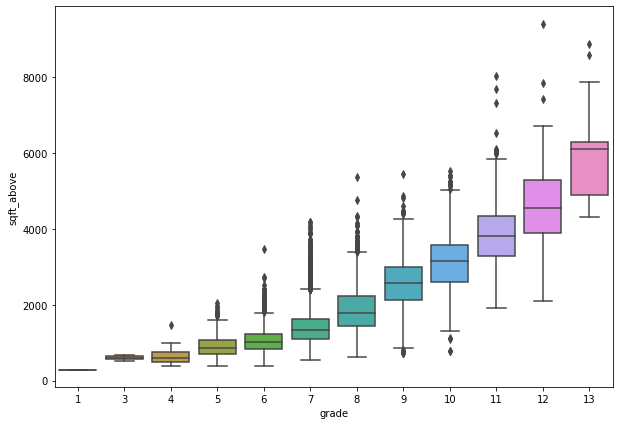

In [15]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='grade', y='sqft_above', data=df)

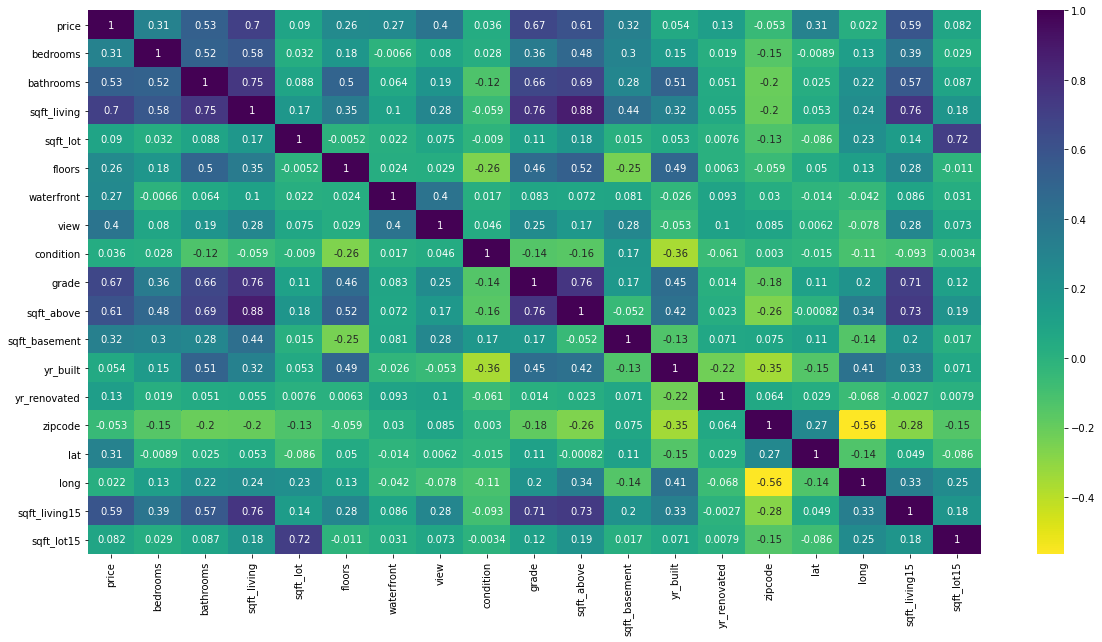

In [16]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.drop('id', axis=1).corr(), annot=True, cmap='viridis_r')

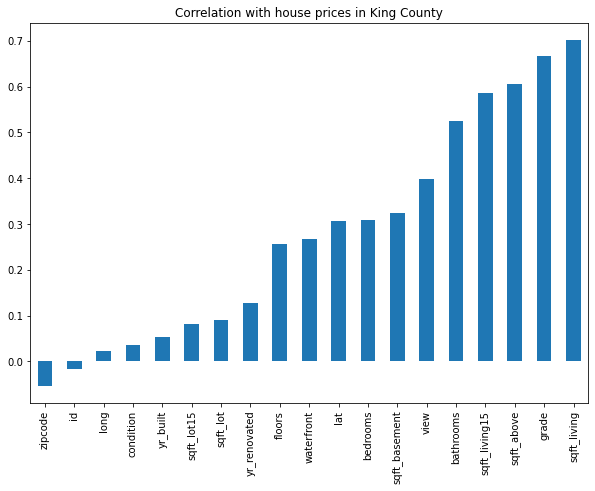

In [18]:
plt.figure(figsize=(10, 7))
df.corr().sort_values('price').drop('price')['price'].plot(kind='bar', title='Correlation with house prices in King County')

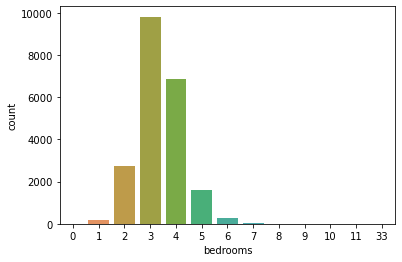

In [20]:
sns.countplot(df.bedrooms)

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Number of Bedrooms'),
 Text(0.5, 1.0, 'Comparison of House price and number of bedrooms')]

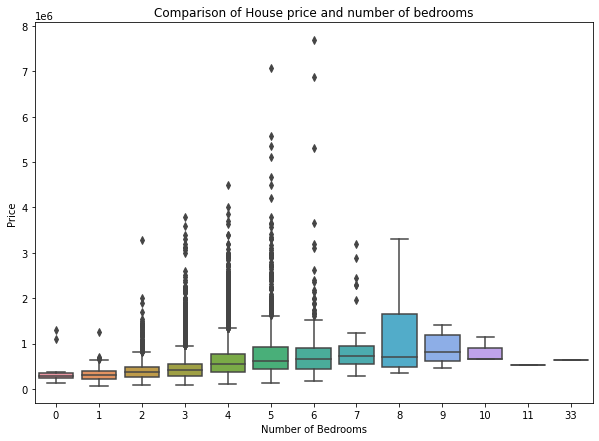

In [22]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='bedrooms', y='price', data=df).set(xlabel='Number of Bedrooms', ylabel='Price', title='Comparison of House price and number of bedrooms')

In [23]:
df.drop(['date'],axis=1,inplace=True)

In [24]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [25]:
df.cov()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,8.274629e+18,-1.770198e+13,3.441285e+06,1.143211e+07,-3.238447e+10,-1.574060e+13,2.877549e+07,-677205.124699,2.555378e+07,-4.451878e+07,2.749138e+07,-2.582659e+10,-6.557877e+09,1.806504e+09,-1.953526e+10,-1.265812e+09,-753702.190562,8.425548e+06,-5.719541e+09,-1.090150e+13
price,-1.770198e+13,1.347824e+11,1.052863e+05,1.484815e+05,2.367154e+08,1.363437e+09,5.090800e+04,8460.643388,1.117730e+05,8.687030e+03,2.880265e+05,1.841014e+08,5.261406e+07,5.824484e+05,1.864486e+07,-1.045072e+06,15617.422517,1.118118e+03,1.472964e+08,8.264591e+08
bedrooms,3.441285e+06,1.052863e+05,8.650150e-01,3.695271e-01,4.925960e+02,1.221324e+03,8.810446e-02,-0.000530,5.668416e-02,1.723221e-02,3.902536e-01,3.678361e+02,1.247599e+02,4.212004e+00,7.038678e+00,-7.597239e+00,-0.001151,1.695825e-02,2.496518e+02,7.426446e+02
bathrooms,1.143211e+07,1.484815e+05,3.695271e-01,5.931513e-01,5.338120e+02,2.798944e+03,2.082114e-01,0.004247,1.108004e-01,-6.263824e-02,6.020054e-01,4.370876e+02,9.672443e+01,1.144733e+01,1.569654e+01,-8.400840e+00,0.002622,2.419130e-02,3.001611e+02,1.833182e+03
sqft_living,-3.238447e+10,2.367154e+08,4.925960e+02,5.338120e+02,8.435337e+05,6.574684e+06,1.755404e+02,8.249461,2.003143e+02,-3.511460e+01,8.234077e+02,6.666978e+05,1.768358e+05,8.580238e+03,2.042442e+04,-9.800232e+03,6.685035,3.107108e+01,4.761601e+05,4.596302e+06
sqft_lot,-1.574060e+13,1.363437e+09,1.221324e+03,2.798944e+03,6.574684e+06,1.715659e+09,-1.163286e+02,77.418670,2.371393e+03,-2.414616e+02,5.531997e+03,6.294462e+06,2.802218e+05,6.458085e+04,1.271708e+05,-2.871637e+05,-491.766060,1.338837e+03,4.105319e+06,8.126540e+08
floors,2.877549e+07,5.090800e+04,8.810446e-02,2.082114e-01,1.755404e+02,-1.163286e+02,2.915880e-01,0.001107,1.218394e-02,-9.268648e-02,2.908243e-01,2.342603e+02,-5.871985e+01,7.761250e+00,1.374814e+00,-1.708121e+00,0.003712,9.537583e-03,1.035866e+02,-1.661524e+02
waterfront,-6.772051e+05,8.460643e+03,-5.296680e-04,4.247388e-03,8.249461e+00,7.741867e+01,1.107146e-03,0.007485,2.664300e-02,9.375805e-04,8.417993e-03,5.163720e+00,3.085741e+00,-6.648330e-02,3.227949e+00,1.401912e-01,-0.000171,-5.106370e-04,5.127103e+00,7.252979e+01
view,2.555378e+07,1.117730e+05,5.668416e-02,1.108004e-01,2.003143e+02,2.371393e+03,1.218394e-02,0.026643,5.872426e-01,2.293397e-02,2.263832e-01,1.063870e+02,9.392727e+01,-1.202897e+00,3.198718e+01,3.478060e+00,0.000654,-8.460837e-03,1.472943e+02,1.518526e+03
condition,-4.451878e+07,8.687030e+03,1.723221e-02,-6.263824e-02,-3.511460e+01,-2.414616e+02,-9.268648e-02,0.000938,2.293397e-02,4.234665e-01,-1.106640e-01,-8.525727e+01,5.014267e+01,-6.908312e+00,-1.584488e+01,1.053428e-01,-0.001347,-9.760027e-03,-4.140089e+01,-6.050935e+01


In [26]:
y=df['price']
X=df.drop('price',axis=1)
xc=sm.add_constant(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
import scipy.stats as stats
print(np.abs(round(stats.norm.isf(q = 0.025),2)))

1.96


In [29]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'\nR^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.7046025703554912

R^2 score for test: 0.6878384216834144


In [30]:
from scipy.stats import ttest_1samp
print(df.mean(),np.std(df,ddof = 1))

id               4.580302e+09
price            5.400881e+05
bedrooms         3.370842e+00
bathrooms        2.114757e+00
sqft_living      2.079900e+03
sqft_lot         1.510697e+04
floors           1.494309e+00
waterfront       7.541757e-03
view             2.343034e-01
condition        3.409430e+00
grade            7.656873e+00
sqft_above       1.788391e+03
sqft_basement    2.915090e+02
yr_built         1.971005e+03
yr_renovated     8.440226e+01
zipcode          9.807794e+04
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.986552e+03
sqft_lot15       1.276846e+04
dtype: float64 id               2.876566e+09
price            3.671272e+05
bedrooms         9.300618e-01
bathrooms        7.701632e-01
sqft_living      9.184409e+02
sqft_lot         4.142051e+04
floors           5.399889e-01
waterfront       8.651720e-02
view             7.663176e-01
condition        6.507430e-01
grade            1.175459e+00
sqft_above       8.280910e+02
sqft_basement    4.425750

In [31]:
Xc = sm.add_constant(X)
lin_reg = sm.OLS(y,Xc).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2797.
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:02:37   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.939e+06   2.93e+06      2.366      0.018    1.19e+06    1.27e+07
id            -1.289e-06   4.82e-07     -2.671      0.008   -2.23e-06   -3.43e-07
bedrooms      -3.576e+04   1891.574    -18.907      0.000   -3.95e+04   -3.21e+04
bathrooms      4.116e+04   3253.218     12.651      0.000    3.48e+04    4.75e+04
sqft_living     110.3943      2.269     48.646      0.000     105.946     114.842
sqft_lot          0.1218      0.048      2.539      0.011       0.028       0.216
floors         6764.7563   3595.459      1.881      0.060    -282.608    1.38e+04
waterfront     5.827e+05   1.74e+04     33.567      0.000    5.49e+05    6.17e+05
view           5.303e+04   2140.594     24.774      0.000    4.88e+04    5.72e+04
condition      2.625e+04   2351.639     11.164      0.000    2.16e+04    3.09e+04
grade          9.601e+04   2152.926     44.594      0.000    9.18e+04       1e+05
sqft_above       70.6930      2.253     31.373      0.000      66.276      75.110
sqft_basement    39.7096      2.646     15.006      0.000      34.523      44.896
yr_built      -2622.2522     72.653    -36.093      0.000   -2764.657   -2479.847
yr_renovated     19.6458      3.656      5.374      0.000      12.481      26.811
zipcode        -582.2481     32.981    -17.654      0.000    -646.894    -517.603
lat            6.024e+05   1.07e+04     56.115      0.000    5.81e+05    6.23e+05
long          -2.128e+05   1.32e+04    -16.179      0.000   -2.39e+05   -1.87e+05
sqft_living15    21.6256      3.447      6.273      0.000      14.869      28.383
sqft_lot15       -0.3964      0.073     -5.398      0.000      -0.540      -0.252
==============================================================================
Omnibus:                    18406.018   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1881616.153
Skew:                           3.571   Prob(JB):                         0.00
Kurtosis:                      48.149   Cond. No.                     1.84e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.87e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
basr mode is fitted with the 0.77 R^2 Value

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'\nIntercept: {lin_reg.intercept_}')
print(f'\nR^2 score: {lin_reg.score(X, y)}')

Coefficients: [-1.28870267e-06 -3.57634698e+04  4.11556892e+04  1.10397022e+02
  1.21836220e-01  6.76475629e+03  5.82652150e+05  5.30314207e+04
  2.62546201e+04  9.60069726e+04  7.06902251e+01  3.97067970e+01
 -2.62225222e+03  1.96457732e+01 -5.82248144e+02  6.02354570e+05
 -2.12792580e+05  2.16256348e+01 -3.96442702e-01]

Intercept: 6938891.719960287

R^2 score: 0.6998463505666739


In [35]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,y_train)
print('R2 sq: ',model_score)
y_predicted = model.predict(X_test)
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))
print("RMSE:%.2f"% np.sqrt(mean_squared_error(y_test, y_predicted)))


R2 sq:  0.7046025703554912
Mean squared error: 42857272313.09
Test Variance score: 0.69
RMSE:207019.98


In [36]:
print(f'R^2 score for train: {model.score(X_train, y_train)}')
print(f'\nR^2 score for test: {model.score(X_test, y_test)}')

R^2 score for train: 0.7046025703554912

R^2 score for test: 0.6878384216834144


In [ ]:
# Splitting categorical variables with numerical variables
categorical = df.select_dtypes(['object'])
numerical = df.select_dtypes(exclude=['object'])

print(categorical.shape)
print(numerical.shape)

The sample submission data in [Kaggle](https://www.kaggle.com)  target proposal from a linear regression on year and month of sale, square lot, number of bathrooms and  the number of bedrooms. So, for applying a predictive model, we will use our train data by splitting it into a train and a test data.  We will use that test data (the test data from Kaggle) in the next step to predict the sale price of the houses which are on the market according to  business scenario.

In [42]:
# Choose the independent numeric variables
ind_numeric_vars = numerical.drop('price', axis=1)
ind_numeric_vars

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [48]:
# Define the df_x and df_y for the linear regression
df_x = ind_numeric_vars
df_y = df.price

In [49]:
# Describe df_x (the independent variables)
df_x.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [50]:
reg = LinearRegression()

In [51]:
# Split the data into a train and a test data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.15, random_state=1712)

In [52]:
# Create a regression equation that models the Sales Price (Y-Variable) against all the independent variables
reg.fit(x_train, y_train)

LinearRegression()

In [53]:
reg.coef_

array([-1.37314923e-06, -3.83502406e+04,  4.00733656e+04,  1.15687853e+02,
        8.56787424e-02,  3.54668757e+03,  5.79490410e+05,  5.47308142e+04,
        2.66769284e+04,  9.62512423e+04,  7.48567065e+01,  4.08311465e+01,
       -2.58333493e+03,  1.47889883e+01, -6.01507706e+02,  6.06552838e+05,
       -2.18124017e+05,  1.67004891e+01, -4.08557859e-01])

In [54]:
# Assign the train prediction
train_prediction = reg.predict(x_train)

In [55]:
# The first value of train prediction
train_prediction[0]

567957.4529366894

In [56]:
# R2 Score of train
r2_score(y_train, train_prediction)

0.7002809832645948

In [57]:
# Assign the test prediction
test_prediction = reg.predict(x_test)

In [58]:
# The first value of test prediction
test_prediction[0]

360330.39157545473

In [59]:
# R2 Score of test prediction
r2_score(y_test, test_prediction)

0.6938842088604782

In [60]:
# Predictions (Predicted Sale Prices for test data)
test_prediction

array([360330.39157545, 975025.65697823, 341169.04309384, ...,
       766465.98431166, 269816.05391024, 827243.30473601])

In [62]:
# Create a data frame that shows Sale Prices and Predictions to compare each other
results = pd.DataFrame({'SalePrice':y_test, 'Predictions':test_prediction})
results

,SalePrice,Predictions
852,438000.0,360330.391575
8957,894000.0,975025.656978
2724,390000.0,341169.043094
1938,608250.0,615703.367802
17880,306000.0,425687.909462
...,...,...
15514,500000.0,949269.763646
15759,550000.0,417531.721668
16173,683000.0,766465.984312
8249,320900.0,269816.053910
